# Self Organizing Map

##Install MiniSom Package

In [1]:
!pip install MiniSom

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for MiniSom: filename=MiniSom-2.3.2-py3-none-any.whl size=10663 sha256=0ee1c3ea54921683250556fc18b689e778fc696e40376d7f6d37edf6e7cc33f4
  Stored in directory: c:\users\xobed\appdata\local\pip\cache\wheels\b4\f6\8a\9daf8831901c3e3805775633404248f10663d1c80b7e5a1314
Successfully built MiniSom


### Importing the libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### The goal here is to detect fraud in credit card applications

## Importing the dataset

In [3]:
dataset = pd.read_csv('Credit_Card_Applications.csv')


In [4]:
dataset

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [5]:
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

In [7]:
X 

array([[1.5776156e+07, 1.0000000e+00, 2.2080000e+01, ..., 2.0000000e+00,
        1.0000000e+02, 1.2130000e+03],
       [1.5739548e+07, 0.0000000e+00, 2.2670000e+01, ..., 2.0000000e+00,
        1.6000000e+02, 1.0000000e+00],
       [1.5662854e+07, 0.0000000e+00, 2.9580000e+01, ..., 2.0000000e+00,
        2.8000000e+02, 1.0000000e+00],
       ...,
       [1.5675450e+07, 0.0000000e+00, 1.8830000e+01, ..., 2.0000000e+00,
        1.0000000e+02, 1.0000000e+00],
       [1.5776494e+07, 0.0000000e+00, 2.7420000e+01, ..., 2.0000000e+00,
        1.2000000e+02, 1.2000000e+01],
       [1.5592412e+07, 1.0000000e+00, 4.1000000e+01, ..., 1.0000000e+00,
        5.6000000e+02, 1.0000000e+00]])

## Feature Scaling


In [8]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

## Training the SOM


In [19]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som


1. `x` and `y`: These parameters specify the dimensions of the SOM grid. The SOM grid will have a size of `x` by `y` nodes. In this case, `x=10` and `y=10`, indicating that the SOM grid will have 10 rows and 10 columns, resulting in a total of 100 nodes.

2. `input_len`: This parameter specifies the dimensionality of the input data. It indicates the number of features or dimensions in each input vector. In this case, `input_len=15`, suggesting that each input vector provided to the SOM during training will have 15 features.

3. `sigma`: This parameter controls the spread of the neighborhood function during the training process. It determines the size of the neighborhood around the winning node within which the weights of neighboring nodes are adjusted. A higher value of `sigma` results in a larger neighborhood and vice versa. Here, `sigma=1.0` indicates a moderate spread.

4. `learning_rate`: This parameter determines the magnitude of weight updates during training. It specifies the initial learning rate, which typically decreases over time as training progresses. A higher value of `learning_rate` results in more significant weight updates initially. In this case, `learning_rate=0.5`, indicating a moderate learning rate.



In [20]:
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

In [21]:
som.distance_map().shape

(10, 10)

## Visualizing the results


In [23]:
from pylab import bone, pcolor, colorbar, plot, show
bone()


<Figure size 640x480 with 0 Axes>

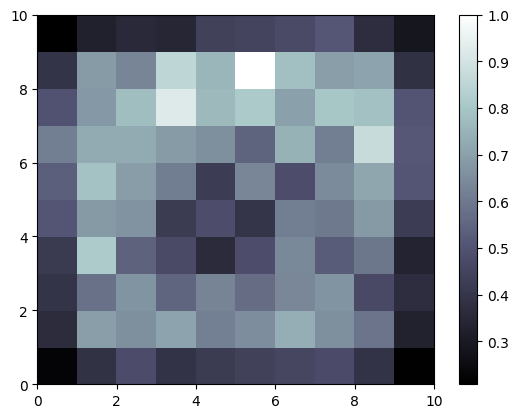

In [26]:
pcolor(som.distance_map().T)
colorbar()


In [32]:
X[0]

array([0.84268147, 1.        , 0.12526316, 0.40928571, 0.5       ,
       0.23076923, 0.375     , 0.05561404, 0.        , 0.        ,
       0.        , 1.        , 0.5       , 0.05      , 0.01212   ])

In [35]:
som.winner(X[5])

(0, 1)

In [40]:
y[3]

1

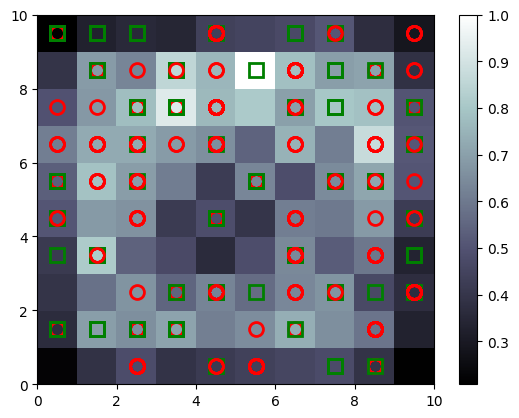

In [41]:
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

### The white boxes indicate to outliers , so it's indicate to high probability to frauds also

## Finding the frauds


In [51]:
mappings = som.win_map(X)
mappings[(5,8)]

[array([0.89857005, 1.        , 0.05639098, 0.78571429, 1.        ,
        0.        , 0.75      , 0.        , 0.        , 0.        ,
        0.        , 1.        , 1.        , 0.225     , 1.        ])]

In [54]:
frauds = np.concatenate((mappings[(5,8)], mappings[(3,7)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [55]:
frauds

array([[1.5790113e+07, 1.0000000e+00, 1.7500000e+01, 2.2000000e+01,
        3.0000000e+00, 1.0000000e+00, 7.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        3.0000000e+00, 4.5000000e+02, 1.0000100e+05],
       [1.5644446e+07, 1.0000000e+00, 3.3500000e+01, 1.7500000e+00,
        2.0000000e+00, 1.4000000e+01, 8.0000000e+00, 4.5000000e+00,
        1.0000000e+00, 1.0000000e+00, 4.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 2.5300000e+02, 8.5800000e+02],
       [1.5803378e+07, 1.0000000e+00, 3.4920000e+01, 5.0000000e+00,
        2.0000000e+00, 1.4000000e+01, 8.0000000e+00, 7.5000000e+00,
        1.0000000e+00, 1.0000000e+00, 6.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 1.0010000e+03],
       [1.5714087e+07, 1.0000000e+00, 3.2750000e+01, 1.5000000e+00,
        2.0000000e+00, 1.3000000e+01, 8.0000000e+00, 5.5000000e+00,
        1.0000000e+00, 1.0000000e+00, 3.0000000e+00, 1.0000000e+00,
        2.0000000e+00,

##Printing the Fraunch Clients

In [56]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15790113
15644446
15803378
15714087
15730793
15788776
15765257
15654859
15767231
15746995
15762716
15706464
15725028
15768474
15764444
15731989
15671534
15771409
15814116
15777893
15785705
15667460
